In [1]:
import pandas as pd
import numpy as np
import glob
import os


In [2]:
df2018 = pd.read_csv('Defense2018.csv')
df2019 = pd.read_csv('Defense2019.csv')
df2020 = pd.read_csv('Defense2020.csv')
df2021 = pd.read_csv('Defense2021.csv')
df2022 = pd.read_csv('Defense2022.csv')

In [3]:
combined_df = pd.concat([df2018, df2019, df2020, df2021, df2022])

In [4]:
combined_df.head(5)

,player,player_id,position,team_name,player_game_count,assists,batted_passes,catch_rate,declined_penalties,forced_fumbles,...,snap_counts_slot,stops,tackles,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,yards_per_reception
0,Julius Peppers,1010,ED,CAR,16,4,5,50.0,1,2,...,0,14,11,4,2,28,0,18,11,18.0
1,Terrell Suggs,1326,ED,BLT,16,9,5,62.5,1,1,...,8,20,18,7,8,54,0,72,59,14.4
2,Mike Adams,1972,S,CAR,16,14,0,79.4,0,0,...,118,18,59,4,34,8,5,446,155,16.5
3,Adam Jones,2223,CB,DEN,6,1,0,66.7,0,0,...,6,2,9,2,15,0,0,90,62,9.0
4,Thomas Davis Sr.,2231,LB,CAR,12,15,1,76.6,0,0,...,38,29,56,3,47,7,2,340,214,9.4


In [5]:
combined_df['position'].unique()
offensive_positions = ['WR', 'TE', 'G', 'FB', 'T', 'QB', 'C', 'HB']
df_defense = combined_df[~combined_df['position'].isin(offensive_positions)].copy()
df_defense.reset_index(drop=True, inplace=True)

In [6]:

df_defense['position'].unique()

array(['ED', 'S', 'CB', 'LB', 'DI'], dtype=object)

In [7]:
df_defense.size

271590

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
print(df_defense.columns)

Index(['player', 'player_id', 'position', 'team_name', 'player_game_count',
       'assists', 'batted_passes', 'catch_rate', 'declined_penalties',
       'forced_fumbles', 'franchise_id', 'fumble_recoveries',
       'fumble_recovery_touchdowns', 'grades_coverage_defense',
       'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense',
       'grades_run_defense', 'grades_tackle', 'hits', 'hurries',
       'interception_touchdowns', 'interceptions', 'longest',
       'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties',
       'qb_rating_against', 'receptions', 'sacks', 'safeties',
       'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage',
       'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap',
       'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t',
       'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball',
       'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot',
       'stops', 'tackles'

In [11]:
snap_columns = [col for col in df_defense.columns if 'snap_counts_' in col]

# Calculate total snap counts per player
df_defense['total_snap_counts'] = df_defense[snap_columns].sum(axis=1) 

In [12]:
# Calculate percentile thresholds
high_threshold = df_defense['total_snap_counts'].quantile(0.75)
low_threshold = df_defense['total_snap_counts'].quantile(0.25)

In [13]:
filtered_df = df_defense[df_defense['total_snap_counts'] >= low_threshold].copy()

# Reset the index of the new DataFrame
filtered_df.reset_index(drop=True, inplace=True)

In [14]:
filtered_df.head(5)

,player,player_id,position,team_name,player_game_count,assists,batted_passes,catch_rate,declined_penalties,forced_fumbles,...,stops,tackles,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,yards_per_reception,total_snap_counts
0,Julius Peppers,1010,ED,CAR,16,4,5,50.0,1,2,...,14,11,4,2,28,0,18,11,18.0,2024
1,Terrell Suggs,1326,ED,BLT,16,9,5,62.5,1,1,...,20,18,7,8,54,0,72,59,14.4,2972
2,Mike Adams,1972,S,CAR,16,14,0,79.4,0,0,...,18,59,4,34,8,5,446,155,16.5,3752
3,Adam Jones,2223,CB,DEN,6,1,0,66.7,0,0,...,2,9,2,15,0,0,90,62,9.0,592
4,Thomas Davis Sr.,2231,LB,CAR,12,15,1,76.6,0,0,...,29,56,3,47,7,2,340,214,9.4,2596


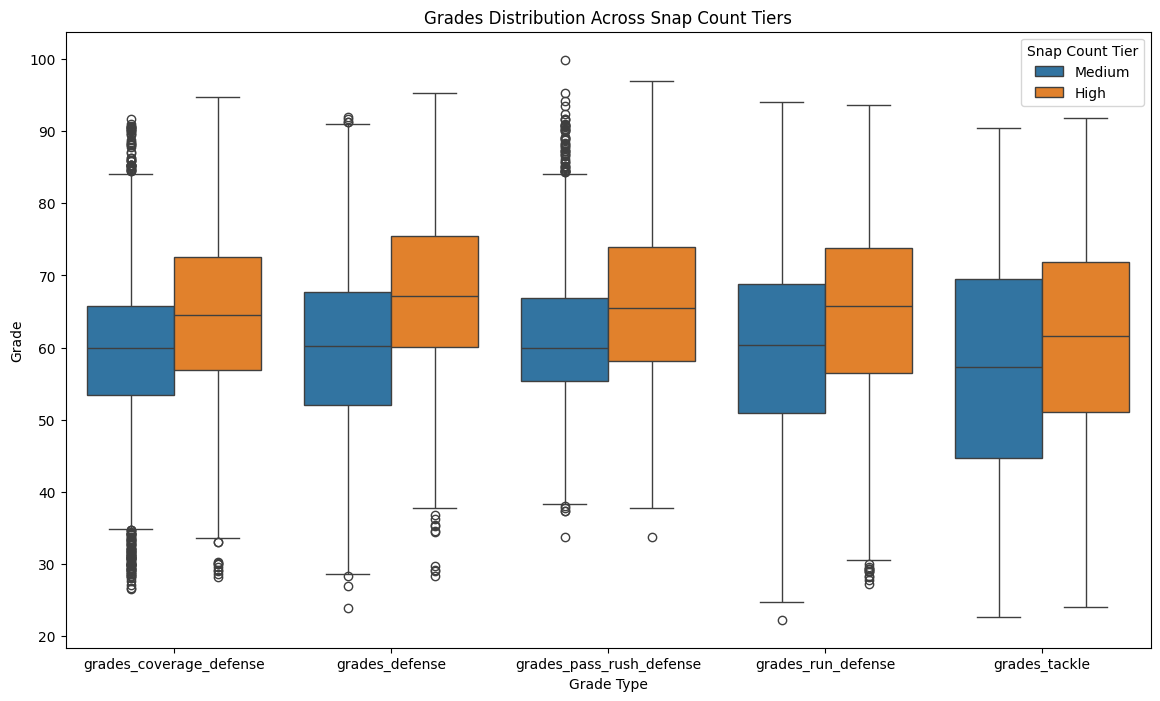

In [16]:
# Create snap count tiers
filtered_df['snap_count_tier'] = np.where(filtered_df['total_snap_counts'] >= high_threshold, 'High', 'Medium')

# Define grade columns
grade_columns = ['grades_coverage_defense', 'grades_defense', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']

# Melt the DataFrame for easier plotting
melted_df = filtered_df.melt(id_vars='snap_count_tier', value_vars=grade_columns, var_name='Grade Type', value_name='Grade')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Grade Type', y='Grade', hue='snap_count_tier', data=melted_df)
plt.title('Grades Distribution Across Snap Count Tiers')
plt.xlabel('Grade Type')
plt.ylabel('Grade')
plt.legend(title='Snap Count Tier')
plt.show()


In [17]:
sns.set(style="whitegrid")

In [18]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


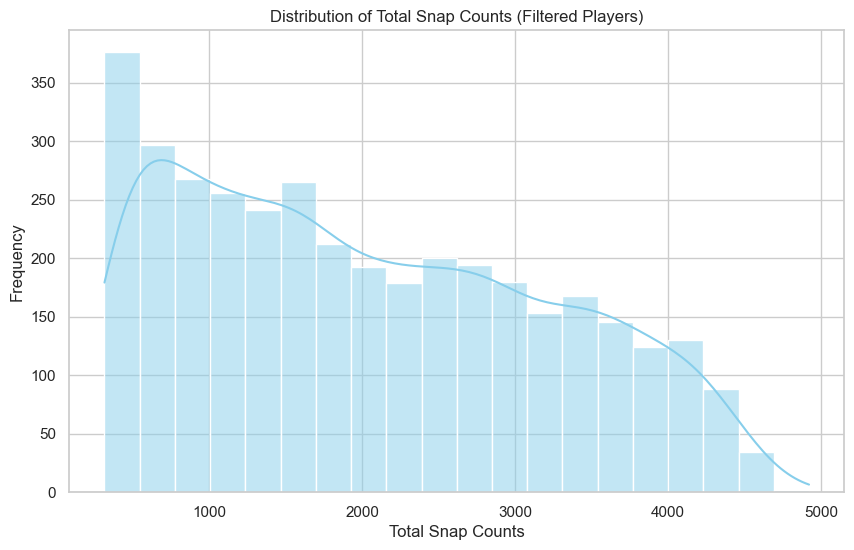

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['total_snap_counts'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Snap Counts (Filtered Players)')
plt.xlabel('Total Snap Counts')

plt.ylabel('Frequency')
plt.show()


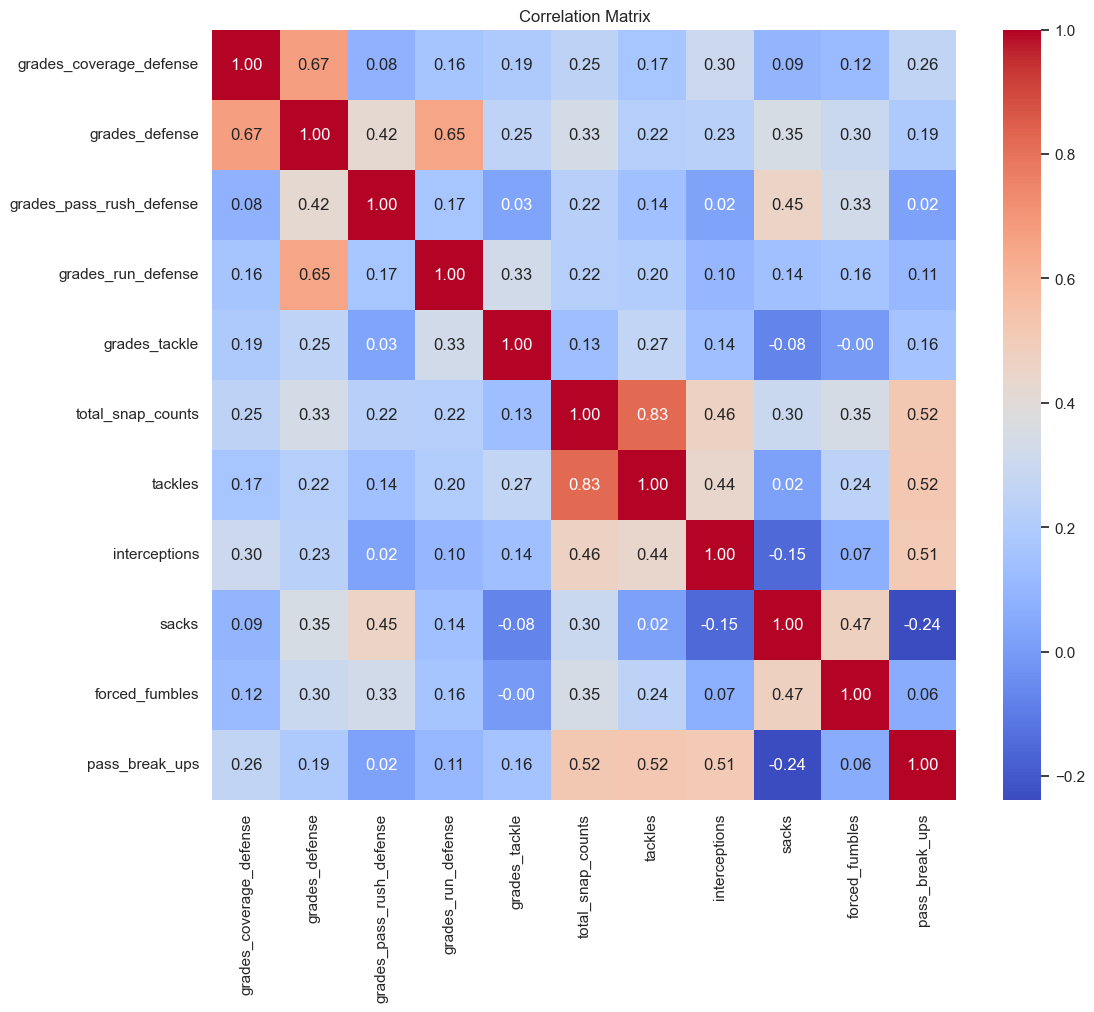

In [20]:
# Select relevant columns for correlation
corr_columns = grade_columns + ['total_snap_counts'] + ['tackles', 'interceptions', 'sacks', 'forced_fumbles', 'pass_break_ups']
corr_matrix = filtered_df[corr_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


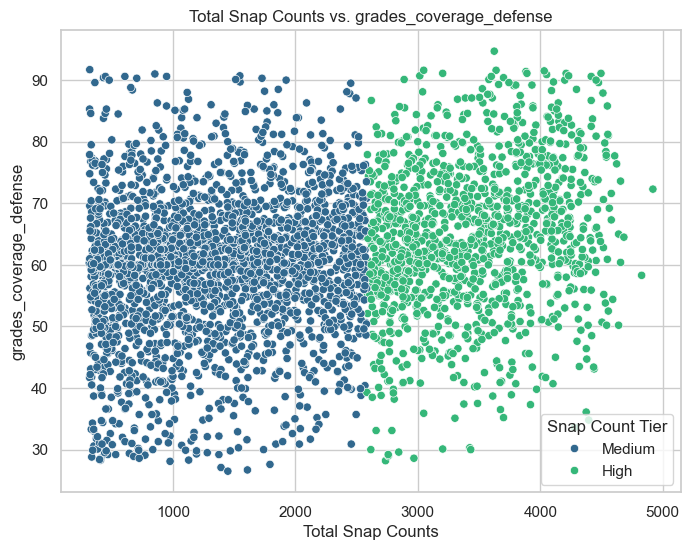

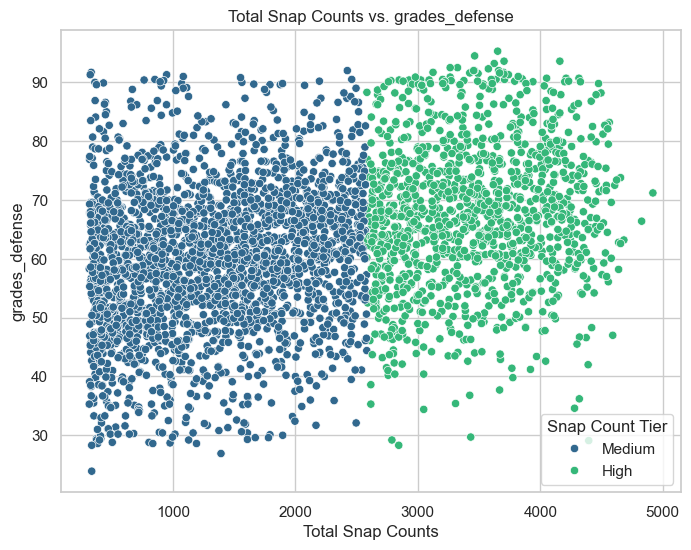

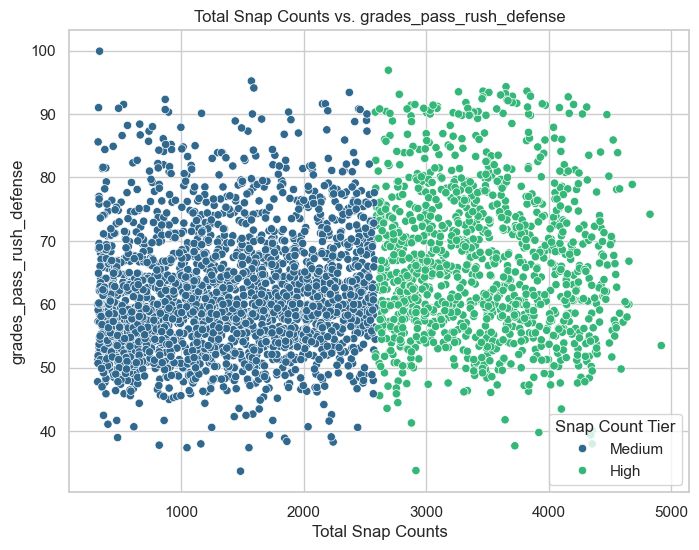

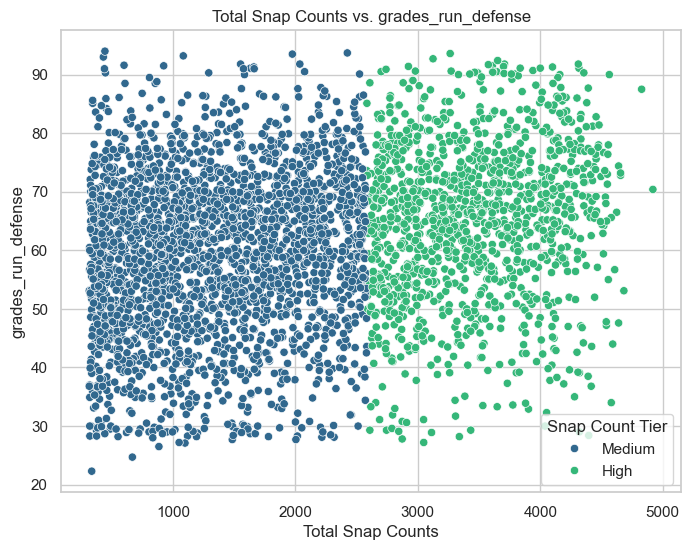

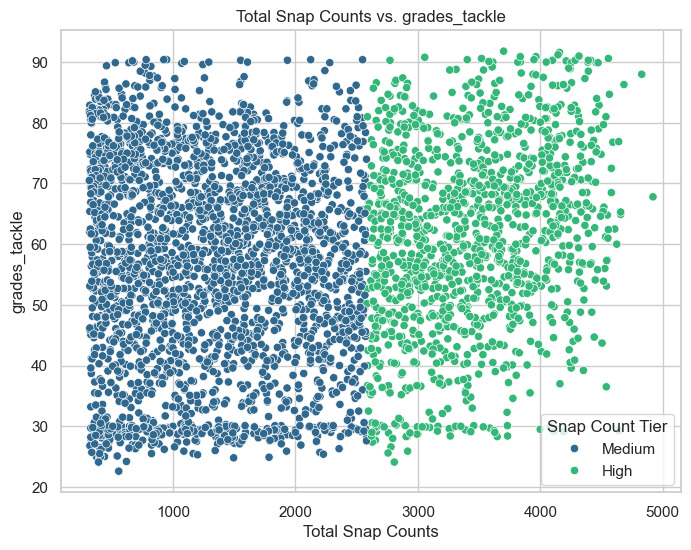

In [21]:
for grade in grade_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=filtered_df, x='total_snap_counts', y=grade, hue='snap_count_tier', palette='viridis')
    plt.title(f'Total Snap Counts vs. {grade}')
    plt.xlabel('Total Snap Counts')
    plt.ylabel(grade)
    plt.legend(title='Snap Count Tier')
    plt.show()


In [235]:
# Now that we have investigated the snap counts, we jump to the actual machine learning portion

In [22]:
# Define target variables
targets = ['grades_coverage_defense', 'grades_defense', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']

# Define feature variables: exclude identifiers, grades, and snap counts
exclude_columns = ['player', 'player_id', 'position', 'team_name', 'season', 'total_snap_counts', 'franchise_id', 'position', 'team_name', 'snap_count_tier']
feature_columns = [col for col in filtered_df.columns if col not in exclude_columns]

print(f"Number of Features: {len(feature_columns)}")
print(f"Features: {feature_columns}")


Number of Features: 50
Features: ['player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yards_after_catch', 'yards_per_reception']


In [237]:
filtered_df.head(5)

,player,player_id,position,team_name,player_game_count,assists,batted_passes,catch_rate,declined_penalties,forced_fumbles,...,tackles,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,yards_per_reception,total_snap_counts,snap_count_tier
0,Julius Peppers,1010,ED,CAR,16,4,5,50.0,1,2,...,11,4,2,28,0,18,11,18.0,2024,Medium
1,Terrell Suggs,1326,ED,BLT,16,9,5,62.5,1,1,...,18,7,8,54,0,72,59,14.4,2972,High
2,Mike Adams,1972,S,CAR,16,14,0,79.4,0,0,...,59,4,34,8,5,446,155,16.5,3752,High
3,Adam Jones,2223,CB,DEN,6,1,0,66.7,0,0,...,9,2,15,0,0,90,62,9.0,592,Medium
4,Thomas Davis Sr.,2231,LB,CAR,12,15,1,76.6,0,0,...,56,3,47,7,2,340,214,9.4,2596,High


In [238]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature variables
filtered_df_scaled = filtered_df.copy()
filtered_df_scaled[feature_columns] = scaler.fit_transform(filtered_df_scaled[feature_columns])

# Verify scaling
print(filtered_df_scaled[feature_columns].head())

   player_game_count   assists  batted_passes  catch_rate  declined_penalties  \
0           0.883045 -0.555162       4.423485   -1.160966            1.010864   
1           0.883045  0.113995       4.423485   -0.518173            1.010864   
2           0.883045  0.783153      -0.456657    0.350882           -0.485635   
3          -1.670072 -0.956657      -0.456657   -0.302195           -0.485635   
4          -0.138202  0.916985       0.519372    0.206897           -0.485635   

   forced_fumbles  fumble_recoveries  fumble_recovery_touchdowns  \
0        1.681234           1.057456                   -0.157528   
1        0.564832           1.057456                    5.562909   
2       -0.551570          -0.530872                   -0.157528   
3       -0.551570          -0.530872                   -0.157528   
4       -0.551570           2.645783                   -0.157528   

   grades_coverage_defense  grades_defense  ...  snap_counts_slot     stops  \
0                 0.91713

In [239]:
from sklearn.model_selection import train_test_split

# Define features (X) and targets (y)
X = filtered_df_scaled[feature_columns]
y = filtered_df_scaled[targets]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (2963, 50)
Testing Set Shape: (741, 50)


In [240]:
#Linear Regression

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [242]:
lr_model = LinearRegression()

In [243]:
# Check if 'grades_defense' exists in the original DataFrame
print("Columns in df_defense:")
print(df_defense.columns.tolist())

# Check if 'grades_defense' exists in the filtered and scaled DataFrame
print("\nColumns in filtered_df_scaled:")
print(filtered_df_scaled.columns.tolist())


Columns in df_defense:
['player', 'player_id', 'position', 'team_name', 'player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yards

In [244]:
# Display all column names to verify 'grades_defense' exists
print("Columns in filtered_df:")
print(filtered_df.columns.tolist())


Columns in filtered_df:
['player', 'player_id', 'position', 'team_name', 'player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yard

In [245]:
# Display all column names to verify 'grades_defense' exists
print("Columns in filtered_df_scaled:")
print(filtered_df_scaled.columns.tolist())


Columns in filtered_df_scaled:
['player', 'player_id', 'position', 'team_name', 'player_game_count', 'assists', 'batted_passes', 'catch_rate', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'longest', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards'

In [246]:
# Display the first few rows to inspect 'grades_defense'
print("\nSample data from filtered_df_scaled:")
print(filtered_df_scaled[['grades_defense'] + ['player']].head())



Sample data from filtered_df_scaled:
   grades_defense            player
0        1.076388    Julius Peppers
1        0.700023     Terrell Suggs
2       -1.053675        Mike Adams
3        0.147488        Adam Jones
4        0.924240  Thomas Davis Sr.


In [247]:
print("Missing values before dropping:")
print(filtered_df_scaled.isnull().sum())

Missing values before dropping:
player                           0
player_id                        0
position                         0
team_name                        0
player_game_count                0
assists                          0
batted_passes                    0
catch_rate                     947
declined_penalties               0
forced_fumbles                   0
franchise_id                     0
fumble_recoveries                0
fumble_recovery_touchdowns       0
grades_coverage_defense         92
grades_defense                   0
grades_defense_penalty           0
grades_pass_rush_defense       249
grades_run_defense               0
grades_tackle                    0
hits                             0
hurries                          0
interception_touchdowns          0
interceptions                    0
longest                       1017
missed_tackle_rate               2
missed_tackles                   0
pass_break_ups                   0
penalties              

In [248]:
filtered_df_scaled = filtered_df_scaled.drop(columns=['catch_rate', 'yards_per_reception', 'longest'])

In [249]:
grade_coverage_25th = filtered_df_scaled['grades_coverage_defense'].quantile(0.25)
missed_tackle_25th = filtered_df_scaled['missed_tackles'].quantile(0.25)
missed_tackle_rate_25th = filtered_df_scaled['missed_tackle_rate'].quantile(0.25)
grades_pass_rush_25th = filtered_df_scaled['grades_pass_rush_defense'].quantile(0.25)

In [250]:
filtered_df_scaled['grades_coverage_defense'].fillna(grade_coverage_25th, inplace=True)
filtered_df_scaled['missed_tackles'].fillna(missed_tackle_25th, inplace=True)
filtered_df_scaled['missed_tackle_rate'].fillna(missed_tackle_rate_25th, inplace=True)
filtered_df_scaled['grades_pass_rush_defense'].fillna(grades_pass_rush_25th, inplace=True)


C:\Users\achin\AppData\Local\Temp\ipykernel_87680\1943259780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df_scaled['grades_coverage_defense'].fillna(grade_coverage_25th, inplace=True)
C:\Users\achin\AppData\Local\Temp\ipykernel_87680\1943259780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [251]:
filtered_df_scaled.isnull().sum()

player                        0
player_id                     0
position                      0
team_name                     0
player_game_count             0
assists                       0
batted_passes                 0
declined_penalties            0
forced_fumbles                0
franchise_id                  0
fumble_recoveries             0
fumble_recovery_touchdowns    0
grades_coverage_defense       0
grades_defense                0
grades_defense_penalty        0
grades_pass_rush_defense      0
grades_run_defense            0
grades_tackle                 0
hits                          0
hurries                       0
interception_touchdowns       0
interceptions                 0
missed_tackle_rate            0
missed_tackles                0
pass_break_ups                0
penalties                     0
qb_rating_against             0
receptions                    0
sacks                         0
safeties                      0
snap_counts_box               0
snap_cou

In [252]:
filtered_df_scaled.columns.tolist()

['player',
 'player_id',
 'position',
 'team_name',
 'player_game_count',
 'assists',
 'batted_passes',
 'declined_penalties',
 'forced_fumbles',
 'franchise_id',
 'fumble_recoveries',
 'fumble_recovery_touchdowns',
 'grades_coverage_defense',
 'grades_defense',
 'grades_defense_penalty',
 'grades_pass_rush_defense',
 'grades_run_defense',
 'grades_tackle',
 'hits',
 'hurries',
 'interception_touchdowns',
 'interceptions',
 'missed_tackle_rate',
 'missed_tackles',
 'pass_break_ups',
 'penalties',
 'qb_rating_against',
 'receptions',
 'sacks',
 'safeties',
 'snap_counts_box',
 'snap_counts_corner',
 'snap_counts_coverage',
 'snap_counts_defense',
 'snap_counts_dl',
 'snap_counts_dl_a_gap',
 'snap_counts_dl_b_gap',
 'snap_counts_dl_outside_t',
 'snap_counts_dl_over_t',
 'snap_counts_fs',
 'snap_counts_offball',
 'snap_counts_pass_rush',
 'snap_counts_run_defense',
 'snap_counts_slot',
 'stops',
 'tackles',
 'tackles_for_loss',
 'targets',
 'total_pressures',
 'touchdowns',
 'yards',
 'ya

In [253]:
# Define target columns (assuming they start with 'grades_')
targets = [col for col in filtered_df_scaled.columns if col.startswith('grades_')]

print(f"Identified Targets: {targets}")

Identified Targets: ['grades_coverage_defense', 'grades_defense', 'grades_defense_penalty', 'grades_pass_rush_defense', 'grades_run_defense', 'grades_tackle']


In [254]:
# Assign y as all grade columns
y = filtered_df_scaled[targets]
# Exclude 'player' and grade columns from features
exclude_columns = ['player', 'position', 'team_name', 'snap_count_tier'] + targets
feature_columns = [col for col in filtered_df_scaled.columns if col not in exclude_columns]

print(f"Number of Features: {len(feature_columns)}")
print(f"Features: {feature_columns}")


Number of Features: 44
Features: ['player_id', 'player_game_count', 'assists', 'batted_passes', 'declined_penalties', 'forced_fumbles', 'franchise_id', 'fumble_recoveries', 'fumble_recovery_touchdowns', 'hits', 'hurries', 'interception_touchdowns', 'interceptions', 'missed_tackle_rate', 'missed_tackles', 'pass_break_ups', 'penalties', 'qb_rating_against', 'receptions', 'sacks', 'safeties', 'snap_counts_box', 'snap_counts_corner', 'snap_counts_coverage', 'snap_counts_defense', 'snap_counts_dl', 'snap_counts_dl_a_gap', 'snap_counts_dl_b_gap', 'snap_counts_dl_outside_t', 'snap_counts_dl_over_t', 'snap_counts_fs', 'snap_counts_offball', 'snap_counts_pass_rush', 'snap_counts_run_defense', 'snap_counts_slot', 'stops', 'tackles', 'tackles_for_loss', 'targets', 'total_pressures', 'touchdowns', 'yards', 'yards_after_catch', 'total_snap_counts']


In [255]:
# Extract 'player' column as labels
labels = filtered_df_scaled['player']

print(f"Number of Labels: {labels.shape[0]}")
print(labels.head())


Number of Labels: 3704
0      Julius Peppers
1       Terrell Suggs
2          Mike Adams
3          Adam Jones
4    Thomas Davis Sr.
Name: player, dtype: object


In [256]:
# Extract label columns
labels = filtered_df_scaled[['player', 'position', 'team_name', 'snap_count_tier']]

print(f"Number of Labels: {labels.shape[0]}")
print(labels.head())


Number of Labels: 3704
             player position team_name snap_count_tier
0    Julius Peppers       ED       CAR          Medium
1     Terrell Suggs       ED       BLT            High
2        Mike Adams        S       CAR            High
3        Adam Jones       CB       DEN          Medium
4  Thomas Davis Sr.       LB       CAR            High


In [257]:
# Assign features (X) and targets (y)
X = filtered_df_scaled[feature_columns]
y = filtered_df_scaled[targets]

print(f"\nFeatures Shape: {X.shape}")
print(f"Targets Shape: {y.shape}")


Features Shape: (3704, 44)
Targets Shape: (3704, 6)


In [258]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(
    X, y, labels, test_size=0.2, random_state=42
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (2963, 44)
Testing Set Shape: (741, 44)


In [259]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("\nSample of scaled training features:")
print(X_train_scaled_df.head())



Sample of scaled training features:
      player_id  player_game_count   assists  batted_passes  \
296   -0.780353           0.873670 -0.691703       2.431156   
1281   0.945501          -0.403936 -0.559442      -0.454482   
507   -0.677113           0.873670 -0.559442      -0.454482   
7     -1.066305           0.107107 -0.427181       0.507397   
3508   1.256811          -0.148414 -0.691703      -0.454482   

      declined_penalties  forced_fumbles  franchise_id  fumble_recoveries  \
296             6.889385       -0.549987     -1.558165           1.075719   
1281           -0.483212        0.568484      0.062424          -0.526772   
507             5.414866       -0.549987     -1.342086          -0.526772   
7              -0.483212        0.568484      0.818699          -0.526772   
3508           -0.483212       -0.549987      0.818699          -0.526772   

      fumble_recovery_touchdowns      hits  ...  snap_counts_slot     stops  \
296                     5.437622  0.215090

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


lr_model = LinearRegression()

target_grade = 'grades_defense'  # Change as needed

# Train the model
lr_model.fit(X_train_scaled_df, y_train[target_grade])

# Predict on the testing set
y_pred_lr = lr_model.predict(X_test_scaled_df)

# Evaluate the model
mse_lr = mean_squared_error(y_test[target_grade], y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test[target_grade], y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")


Linear Regression Performance:
Mean Squared Error (MSE): 0.4444
Root Mean Squared Error (RMSE): 0.6666
R-squared (R²): 0.5552


In [308]:
#Neural Network time



In [262]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.metrics import mean_squared_error, r2_score



In [263]:
filtered_Df_scaled = filtered_df_scaled

In [264]:
print(f"\nFeatures Shape: {X.shape}")
print(f"Targets Shape: {y.shape}")
print(f"Labels Shape: {labels.shape}")


Features Shape: (3704, 44)
Targets Shape: (3704, 6)
Labels Shape: (3704, 4)


In [265]:
X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(X, y, labels, test_size = 0.2, random_state = 42)

In [266]:
scaler = StandardScaler()

In [268]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nSample of scaled training features:")
print(X_train_scaled_df.head())


Sample of scaled training features:
      player_id  player_game_count   assists  batted_passes  \
296   -0.780353           0.873670 -0.691703       2.431156   
1281   0.945501          -0.403936 -0.559442      -0.454482   
507   -0.677113           0.873670 -0.559442      -0.454482   
7     -1.066305           0.107107 -0.427181       0.507397   
3508   1.256811          -0.148414 -0.691703      -0.454482   

      declined_penalties  forced_fumbles  franchise_id  fumble_recoveries  \
296             6.889385       -0.549987     -1.558165           1.075719   
1281           -0.483212        0.568484      0.062424          -0.526772   
507             5.414866       -0.549987     -1.342086          -0.526772   
7              -0.483212        0.568484      0.818699          -0.526772   
3508           -0.483212       -0.549987      0.818699          -0.526772   

      fumble_recovery_touchdowns      hits  ...  snap_counts_slot     stops  \
296                     5.437622  0.215090

In [269]:
input_dim = X_train_scaled.shape[1]

In [270]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(targets), activation='linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
model.summary()

c:\Users\achin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,726 (65.34 KB)

 Trainable params: 16,726 (65.34 KB)

 Non-trainable params: 0 (0.00 B)

In [280]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled_df, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    #callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3398 - mae: 0.4464 - val_loss: 0.5499 - val_mae: 0.5612
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3286 - mae: 0.4388 - val_loss: 0.5534 - val_mae: 0.5620
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3754 - mae: 0.4684 - val_loss: 0.5502 - val_mae: 0.5607
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3392 - mae: 0.4438 - val_loss: 0.5565 - val_mae: 0.5658
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3309 - mae: 0.4409 - val_loss: 0.5499 - val_mae: 0.5612
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3388 - mae: 0.4445 - val_loss: 0.5548 - val_mae: 0.5637
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3351 - mae: 0.4402 - val_loss: 0.5514 - val_mae: 0.5616
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3424 - mae: 0.4469 - val_loss: 0.5545 - val_mae: 0.5600
Epoch 9/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

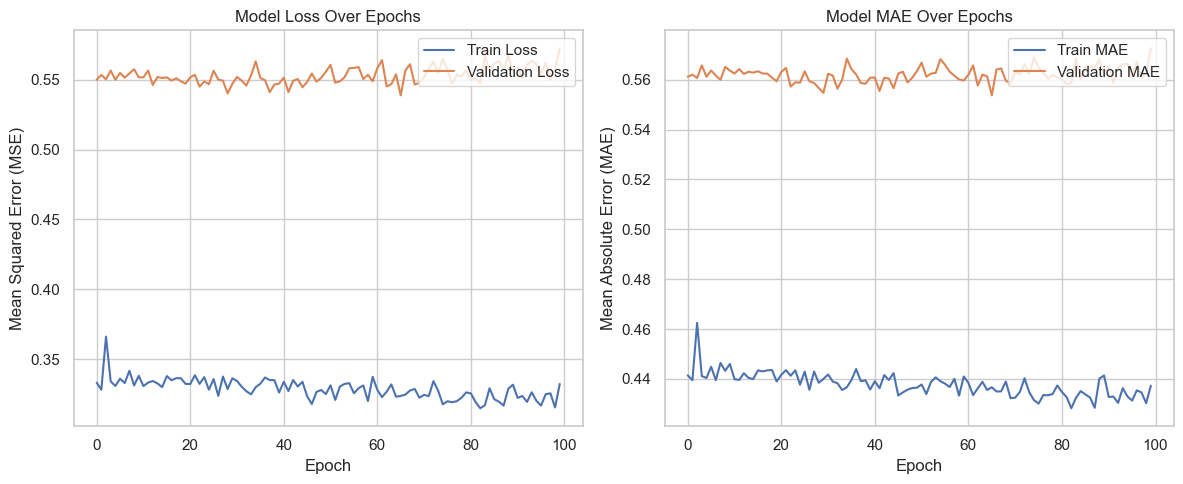

In [281]:
# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



In [282]:
#model evaluation

,player_id,player_game_count,assists,batted_passes,declined_penalties,forced_fumbles,franchise_id,fumble_recoveries,fumble_recovery_touchdowns,hits,...,snap_counts_slot,stops,tackles,tackles_for_loss,targets,total_pressures,touchdowns,yards,yards_after_catch,total_snap_counts
3585,1.365255,-0.148414,1.027689,-0.454482,-0.483212,1.686955,0.386542,-0.526772,-0.156709,-0.652394,...,-0.044483,1.806956,1.523920,0.442053,0.793648,-0.488551,0.576733,0.333941,1.030950,0.289833
1068,-0.718832,-1.937063,-0.691703,-0.454482,-0.483212,-0.549987,1.250856,-0.526772,-0.156709,-0.652394,...,-0.498905,-1.217102,-1.216324,-0.896757,-0.855857,-0.488551,-0.684884,-0.852092,-0.824160,-1.370733
2044,0.994409,0.362628,2.747081,1.469277,-0.483212,2.805426,-0.261694,2.678210,-0.156709,-0.652394,...,0.061872,1.974959,2.620017,1.780862,1.369057,-0.112687,-0.054075,1.451076,1.873271,1.061171
787,-0.886681,0.618149,1.424472,-0.454482,-0.483212,-0.549987,0.278503,1.075719,5.437622,1.371734,...,-0.305534,1.050941,0.638610,0.888322,0.179879,1.328123,0.576733,0.146931,0.730121,0.720974
798,-0.885050,-1.426020,-0.956225,-0.454482,-0.483212,-0.549987,0.602621,-0.526772,-0.156709,-0.652394,...,-0.305534,-0.629091,-0.331015,-0.450487,0.103158,-0.739127,-0.054075,0.378232,-0.102171,-0.660024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,-0.886946,1.129192,-0.691703,0.507397,0.991307,0.568484,0.062424,2.678210,5.437622,0.793412,...,-0.295865,-0.125081,-0.963379,-0.004217,-0.510611,1.453411,-0.684884,-0.502680,-0.262613,-0.003208
1951,0.757145,-0.659457,-0.559442,-0.454482,-0.483212,-0.549987,-1.450126,-0.526772,-0.156709,-0.363232,...,-0.498905,-0.461087,-0.752591,-0.450487,-0.855857,-0.175331,-0.684884,-0.852092,-0.824160,-0.845280
596,-0.111207,0.873670,-0.162659,-0.454482,-0.483212,-0.549987,0.602621,-0.526772,-0.156709,0.793412,...,-0.498905,-0.881095,-0.921221,-0.896757,-0.855857,0.012601,-0.684884,-0.852092,-0.824160,-0.562343
1684,-0.725933,0.873670,0.763167,0.507397,-0.483212,0.568484,-0.585811,-0.526772,-0.156709,0.215090,...,-0.334539,0.210925,0.090561,0.888322,-0.088645,0.576396,-0.054075,0.043584,0.068298,0.175312


In [286]:
y_pred_nn = model.predict(X_test_scaled_df)
results = pd.DataFrame(y_test).reset_index(drop=True)
predictions = pd.DataFrame(y_pred_nn, columns=targets).reset_index(drop=True)
comparision = pd.concat([results, predictions], axis=1)
comparision.columns = [f"Actual_{col}" for col in targets] + targets
print(comparision.head(10))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step
   Actual_grades_coverage_defense  Actual_grades_defense  \
0                        0.705076               0.187527   
1                       -0.202539              -0.429070   
2                        0.730523               0.820140   
3                        0.722041               0.563891   
4                       -0.923542              -0.749380   
5                        0.883206              -0.236884   
6                       -0.219504               0.163504   
7                       -0.049856               2.189465   
8                        1.315808               0.067411   
9                       -0.126198               0.211550   

   Actual_grades_defense_penalty  Actual_grades_pass_rush_defense  \
0                      -0.342993                        -0.653693   
1                       0.740636                        -1.301979   
2                      -1.094474                         2.065236   
3                    

In [288]:
for grade in targets:
    mse = mean_squared_error(y_test[grade], comparision[grade])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[grade], comparision[grade])
    print(f"\n{grade} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


grades_coverage_defense - MSE: 0.6622, RMSE: 0.8138, R²: 0.3256

grades_defense - MSE: 0.5269, RMSE: 0.7259, R²: 0.4725

grades_defense_penalty - MSE: 0.6748, RMSE: 0.8214, R²: 0.3886

grades_pass_rush_defense - MSE: 0.6066, RMSE: 0.7789, R²: 0.3739

grades_run_defense - MSE: 0.8757, RMSE: 0.9358, R²: 0.1336

grades_tackle - MSE: 0.2522, RMSE: 0.5022, R²: 0.7629


In [ ]:
#now we have to fine tune the model in many different ways
# filter between front 7 and secondary
# use optuna hyperparameter tuning
# use different weights for different features
# incorporate cap space and resource allocation into this model

In [289]:
# Using feature attention layers to determine which features are more important and adjusts the model

In [297]:
from tensorflow.keras.layers import Input, Attention
from tensorflow.keras.models import Model


In [291]:
input_layer = Input(shape=(input_dim,))

In [292]:
attention = Dense(64, activation='relu')(input_layer)
attention = Dropout(0.2)(attention)
attention = Dense(32, activation='relu')(attention)
combined = tf.keras.layers.concatenate([input_layer, attention])

In [293]:
#Hidden layers
dense1 = Dense(128, activation='relu')(combined)
drop1 = Dropout(0.3)(dense1 )
dense2 = Dense(64, activation='relu')(drop1)
drop2 = Dropout(0.2)(dense2)

In [298]:
output = Dense(len(targets), activation='linear')(drop2)
model_attention = Model(inputs=input_layer, outputs=output)
model_attention.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_attention.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 44)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      2,880 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 76)        │          0 │ input_layer_1[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │      9,856 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 6)         │        390 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,462 (91.65 KB)

 Trainable params: 23,462 (91.65 KB)

 Non-trainable params: 0 (0.00 B)

In [302]:
history_attention = model_attention.fit(X_train_scaled_df, y_train, epochs=100, batch_size=16, validation_split=0.2, 
                                        #callbacks=[early_stop]
                                        verbose=1)

Epoch 1/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3197 - mae: 0.4288 - val_loss: 0.5121 - val_mae: 0.5319
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3114 - mae: 0.4249 - val_loss: 0.5159 - val_mae: 0.5384
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3125 - mae: 0.4298 - val_loss: 0.5098 - val_mae: 0.5336
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3258 - mae: 0.4331 - val_loss: 0.5067 - val_mae: 0.5302
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3066 - mae: 0.4214 - val_loss: 0.5091 - val_mae: 0.5322
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3180 - mae: 0.4279 - val_loss: 0.5123 - val_mae: 0.5317
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3005 - mae: 0.4157 - val_loss: 0.5144 - val_mae: 0.5341
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3153 - mae: 0.4282 - val_loss: 0.5157 - val_mae: 0.5334
Epoch 9/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [304]:
# Predict on the testing set using the attention model
y_pred_attention = model_attention.predict(X_test_scaled_df)

# Create a DataFrame to compare actual and predicted values
results_attention = pd.DataFrame(y_test).reset_index(drop=True)
predictions_attention = pd.DataFrame(y_pred_attention, columns=targets).reset_index(drop=True)
comparison_attention = pd.concat([results_attention, predictions_attention], axis=1)
comparison_attention.columns = [f"Actual_{col}" for col in targets] + targets

# Display the first few rows of the comparison DataFrame
print(comparison_attention.head(10))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Actual_grades_coverage_defense  Actual_grades_defense  \
0                        0.705076               0.187527   
1                       -0.202539              -0.429070   
2                        0.730523               0.820140   
3                        0.722041               0.563891   
4                       -0.923542              -0.749380   
5                        0.883206              -0.236884   
6                       -0.219504               0.163504   
7                       -0.049856               2.189465   
8                        1.315808               0.067411   
9                       -0.126198               0.211550   

   Actual_grades_defense_penalty  Actual_grades_pass_rush_defense  \
0                      -0.342993                        -0.653693   
1                       0.740636                        -1.301979   
2                      -1.094474                         2.065236   
3                       

In [306]:
for grade in targets:
    mse = mean_squared_error(y_test[grade], comparison_attention[grade])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[grade], comparison_attention[grade])
    print(f"\n{grade} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


grades_coverage_defense - MSE: 0.5984, RMSE: 0.7736, R²: 0.3906

grades_defense - MSE: 0.4734, RMSE: 0.6880, R²: 0.5262

grades_defense_penalty - MSE: 0.5673, RMSE: 0.7532, R²: 0.4860

grades_pass_rush_defense - MSE: 0.5681, RMSE: 0.7537, R²: 0.4136

grades_run_defense - MSE: 0.7851, RMSE: 0.8861, R²: 0.2231

grades_tackle - MSE: 0.1901, RMSE: 0.4360, R²: 0.8212


In [307]:
# split into position groups and see if the model performs better
# analyze feature importance for different position groups and identify if they are the same or different
# proceed to the investigation of cap data, grouping by year, team and position group to give it a score and identify corrleation to cap data
# use the cap data to predict the grade of the player in the future?
# Also use draft capital data?